##Welcome to GeoDiagram Assistant!
**This friendly python notebook will help you out with all those tedious Geochemical Diagrams everybody hates doing but are extremely important in the study of rocks. *GeoDiagram Friend* is the perfect tool for geologists who are looking excel and save lots of time for your classes or for personal investigation.**

Please run the following 5 blocks of code and let the fun begin!


In [366]:
import numpy as np
import matplotlib
from matplotlib.figure import Figure
from matplotlib import style
import matplotlib.animation as animation
import matplotlib.pylab as py
import urllib
from scipy.misc import imread



In [519]:
data=[]
SV=[]
SV1=[]
example=str("example")
def Datos(archivo):
    global data
    global SV
    global SV1
    
    if (archivo==example):
        data=np.genfromtxt("https://raw.githubusercontent.com/nrangel95/Proyecto/master/GeoDatos.csv", delimiter=',')
    else:
        data=np.genfromtxt(archivo, delimiter=',')
    
    #SV represents the standard values for the Chondritic and MORB (Mid Ocean Ridge Basalt) compositions.
    SV= np.genfromtxt("https://raw.githubusercontent.com/nrangel95/Proyecto/master/Condrito.csv", delimiter=',')
    SV1= np.genfromtxt("https://raw.githubusercontent.com/nrangel95/Proyecto/master/Condrito.csv", delimiter=',',dtype='str')
    #En esta línea se descarga la imagen plantilla del Diagrama de Variación TAS.
    
    import urllib.request
    urllib.request.urlretrieve("https://cloud.githubusercontent.com/assets/12629060/8786975/f97c5e1a-2ef6-11e5-971e-2a3140a77a7a.png","TAS.jpg")

Datos(example)

def estilacho(estilo):
    if (estilo==1):
        style.use("fivethirtyeight")
    if (estilo==2):
        style.use("ggplot")
    if (estilo==3):
        style.use('dark_background')
    else:
        style.use('bmh')

In [540]:
#GRAPHS Code.

MORB=SV[2][31:52]      #Acá quedarán consignados los valores de composición del MORB.
y="yes"
n="no"

def spider(estilo, guarda):
    
    estilacho(estilo)

    py.figure(figsize=(13,7))
    ejex=SV1[0,31:52]
    x = linspace(0,1,len(ejex))
    py.xticks(x, ejex)
    py.yscale('log')
    py.ylabel('Muestra/N-MORB /log', fontsize=12)
    py.xlim(-0.001,1.001)
    elementos=[]
    
    
    for i in range (1,len(data)-1):
        for j in range (30,51):
            elementos.append(data[i,j])
        elementos=elementos/MORB
        py.plot(x,elementos, label='Muestra '+str(i))
        elementos=[]
    
    py.legend()
    py.show()
    
    if (guarda==y):
        savefig("Spider.jpg")
        
   #--------------------------------------------------------------------------------------------------------
    
#Gráfica de Tierras Raras (Normalizado al Condrito) cuya composición está consignada a continuación. 
Condr=SV[1][28:52]  

def TR(estilo,guarda):
    
    estilacho(estilo)

    py.figure(figsize=(13,7))
    ejex=SV1[0,28:52]   #Cambio el eje x para tomar las Tierras Raras.
    x = linspace(0,1,len(ejex))
    py.xticks(x, ejex)
    py.yscale('log')
    py.ylabel('Muestra/Condrito /log', fontsize=12)
    py.xlim(-0.001,1.001)
    
    elementos2=[]
    
    
    for i in range (1,len(data)-1):
        for j in range (27,51):
            elementos2.append(data[i,j])
        elementos2=elementos2/Condr
        py.plot(x,elementos2, label='Muestra '+str(i))
        
        elementos2=[]
    
    py.legend(loc=4)
    py.show()

    if (guarda==y):
        savefig("TR.jpg")
        
  #--------------------------------------------------------------------------------------------------------

def TAS(estilo,guarda):

    estilacho(estilo)
    
    silice=[]
    oxidos=[]
    
    py.figure(figsize=(15,9))
    xlim(35,79)
    ylim(0,16)
    img = imread("TAS.jpg")
    
    for i in range (1,len(data)-1):
        silice.append(data[i,1])
        oxidos.append(data[i,7]+data[i,8])
        py.plot(silice[-1],oxidos[-1],"o",zorder=1,label='Muestra '+str(i))
    
    xlabel("$SiO_2  wt\%$",fontsize=20)
    ylabel("$Na_2O + K_2O$ $ wt\%$",fontsize=20)
    py.legend()
    py.imshow(img,zorder=0,extent=[35, 79, 0, 16])
    py.grid('off')
    py.show()
    
    if (guarda==y):
        savefig("TAS.jpg")


###Please take into account the following instructions:

####Getting Started

1. The file that contains the laboratory results for your sample must be in a comma separated value format (csv).
2. You must import it using the "Datos" function. Please enter the exact name of the file in the space provided. 
3. If you do not have a valid file currently, please enter the word "example" in the function Datos. It will download an example file you could use as a trial in the meantime in order to get used to how *GeoDiagram Assistant* works.\



In [369]:
Datos(example)

####Graphing

1. Please choose between a Spider Diagram, Rare Earth Elements Diagram and a TAS Variation Diagram, which are defined by the following functions respectively spider(), TR() and TAS(). 
2. As the first argument you may choose between the four we offer. Just enter a number and try them all!
3. As second argument you must enter 'y' or 'n' in order to save you diagram or not. If you enter a 'y' an image will download with the name of the diagram you made.


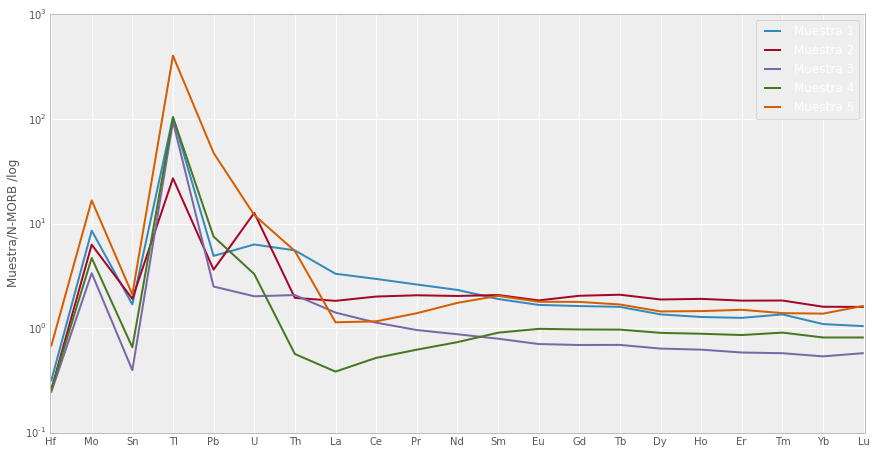

In [429]:
spider(2,n)



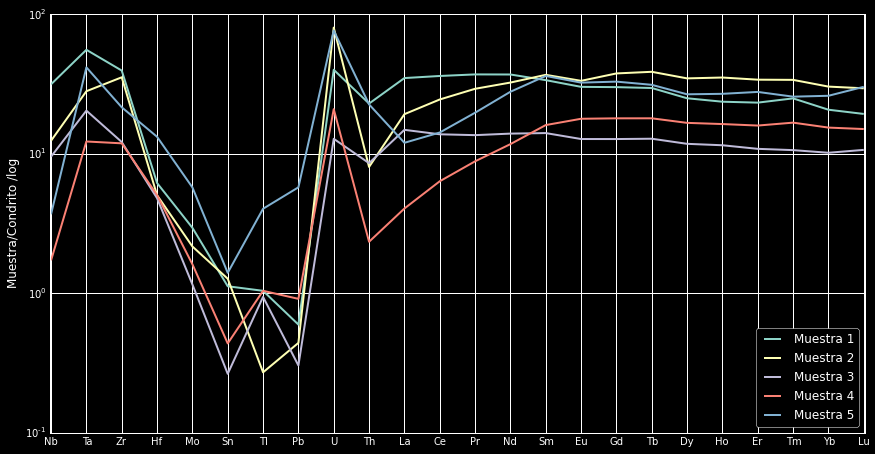

In [430]:
TR(3,n)

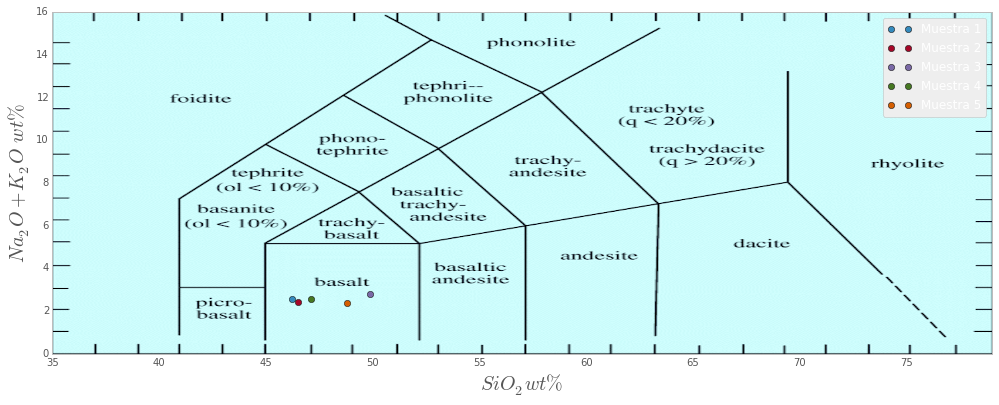

In [541]:
TAS(2,n)